### Notebook summary soundnet
---
- model : soundnet_pytorch (soundnet.extract_scenes)
- audio : soundfile
- preprocessing : sox (utils.audiopath_resample)

In [1]:
#--mesure time
import time 
# soundnet in pytorch
import soundnet.extract_features as ex
#load with soundfile
import soundfile as sf
import pandas as pd
# graphs
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import os

In [2]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_distances
import joblib


In [3]:
from sklearn.decomposition import PCA,MiniBatchSparsePCA,TruncatedSVD,MiniBatchDictionaryLearning
from sklearn.decomposition import DictionaryLearning
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.metrics.pairwise import cosine_similarity

In [4]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [5]:
def load_audio(filepath):
    start = time.time()
    sound, sr = sf.read(filepath,dtype ='float32')      
    if sr != 22050:
        print("Sampling rate dif, making")
        # TODO os.system()
        return
    print('time: ', time.time()-start)
    return sound, sr

In [6]:
#to_utils
def get_values():
    to_time = {}
    with open('relation_layer_seconds.txt', 'r') as reader:
        for i in reader:
            key,m,b = i.split()
            if key != 'name_layer':
                to_time[key] = [float(m),float(b)]
    return to_time

In [7]:
def write_clustered_segments(data_audio,data_clustering,name_layer,resultpath):
   
    cursr = 22050
    m,b = get_values()[name_layer] #get slope (m) and interception (b) for a given layer
    seglength = int((1/m)*cursr)
    for i in range(data_clustering.max()+1): # Loop through all cluster labels
         # fetch all labels with the current value
        ind_curlabel = np.argwhere(data_clustering==i)
        # Calculate the offsets in the original wave file 
        offsets_wave = ind_curlabel * seglength        
        bigwave = []        
        
        for curoffset in tqdm(range(len(offsets_wave))):
            # cut the original wave file and save the excerpt
            curwave = data_audio[offsets_wave[curoffset][0]:(offsets_wave[curoffset][0]+seglength)]      
            if len(curwave) == 0:
                continue           
            bigwave.append(curwave)      
        bigwave = np.hstack(bigwave)
        sf.write(os.path.join(resultpath,'{}_summary_cluster_{}.wav'.format(name_layer,i)), bigwave, cursr)

In [8]:
#utils
def plot_two_axis(data_audio,data_clustering,name_layer,resultdir,duration=None):      
    fig, ax1 = plt.subplots(figsize=(14,7)) 
    t = (np.array(range(0,len(data_audio))))/22050  #vector_time to audio
    xlim = duration*22050 if (duration != None) else duration #seg --> to --> sample
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('audio')
    ax1.plot(t[:xlim], data_audio[:xlim])
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()  # 
    m,b = get_values()[name_layer] #get slope (m) and interception (b) for a given layer
    t = (np.array(range(0,len(data_clustering))))/m
    xlim = int((duration*m)+b) if (duration != None) else duration  #seg --> to --> label    
    ax2.set_ylabel('cluster', color = 'r')  # we already handled the x-label with ax1
    ax2.plot(t[:xlim], data_clustering[:xlim],'r')
    ax2.tick_params(axis='y',color='r')
    plt.title(name_layer+'non_b')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(os.path.join(resultdir,'cluster.png'))
    plt.show()
    return t


In [8]:
def write(data_audio,data_clustering,name_layer,outputpath):
    resultdir = os.path.join(outputpath)
    os.makedirs(resultdir,exist_ok=True)
    write_clustered_segments(data_audio,data_clustering,name_layer,outputpath)

In [9]:
# test camila pca
def extract(filepath,idlayer = 6,save = True):
    audio,sr = load_audio(filepath)
    features = ex.extract_pytorch_feature(audio,'./soundnet/sound8.pth')   
    print([x.shape for x in features])
    
    ##extract vector
    conv = ex.extract_vector(features,idlayer) #features vector   
    #np.savez_compressed("{}features_conv{}".format(idlayer+1),vector = conv,idlayer =idlayer)
    return audio,conv 

/home/brain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


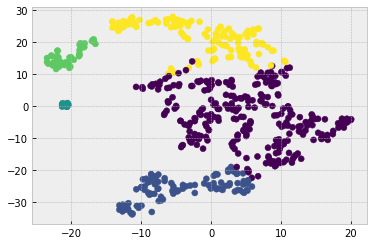

In [72]:
spectral = SpectralClustering(
        n_clusters=5, eigen_solver='arpack',
        affinity="nearest_neighbors",
         random_state=0).fit((tr))
labels = spectral.labels_
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels)

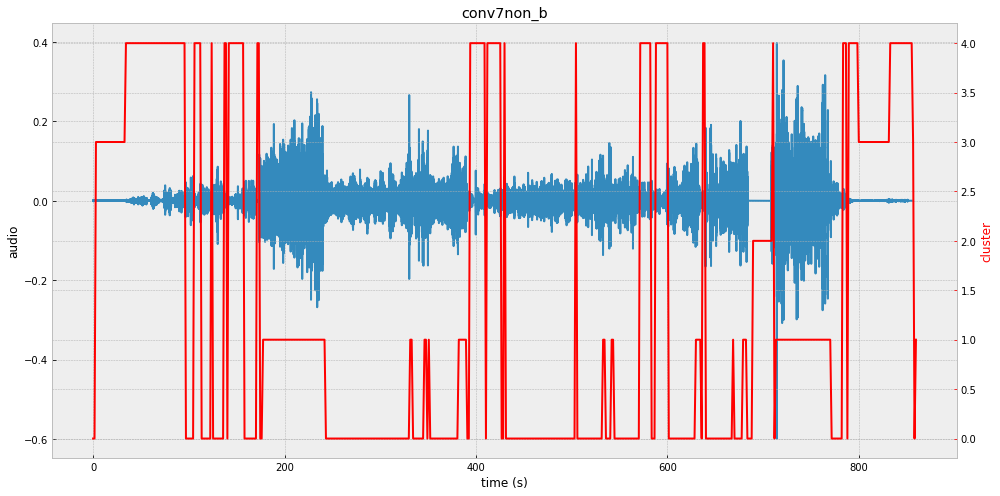

array([  0.        ,   1.49253731,   2.98507463,   4.47761194,
         5.97014925,   7.46268657,   8.95522388,  10.44776119,
        11.94029851,  13.43283582,  14.92537313,  16.41791045,
        17.91044776,  19.40298507,  20.89552239,  22.3880597 ,
        23.88059701,  25.37313433,  26.86567164,  28.35820896,
        29.85074627,  31.34328358,  32.8358209 ,  34.32835821,
        35.82089552,  37.31343284,  38.80597015,  40.29850746,
        41.79104478,  43.28358209,  44.7761194 ,  46.26865672,
        47.76119403,  49.25373134,  50.74626866,  52.23880597,
        53.73134328,  55.2238806 ,  56.71641791,  58.20895522,
        59.70149254,  61.19402985,  62.68656716,  64.17910448,
        65.67164179,  67.1641791 ,  68.65671642,  70.14925373,
        71.64179104,  73.13432836,  74.62686567,  76.11940299,
        77.6119403 ,  79.10447761,  80.59701493,  82.08955224,
        83.58208955,  85.07462687,  86.56716418,  88.05970149,
        89.55223881,  91.04477612,  92.53731343,  94.02

In [73]:
plot_two_axis(audio,labels,'conv7','.')

In [75]:
write(audio,labels,'.','conv7')


100%|██████████| 132/132 [00:00<00:00, 364242.19it/s]


In [76]:
audiopath = './audio22k/jetedonne_.wav'
audio,conv = extract(audiopath,6) #conv7
start = time.time()
X_embedded = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(conv)
print(time.time()-start)

time:  0.027666330337524414
Tensor shape: torch.Size([1, 1, 5266944, 1])
[(1, 16, 329184, 1), (1, 32, 20574, 1), (1, 64, 10288, 1), (1, 128, 5145, 1), (1, 256, 643, 1), (1, 512, 322, 1), (1, 1024, 162, 1), (1, 1000, 78, 1), (1, 401, 78, 1)]
Cout :  1024
0.36946606636047363


In [101]:
audiopath = './audio22k/test_nico_.wav'
audio,conv = extract(audiopath,4) #conv5
start = time.time()
X_embedded = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(conv)
print(time.time()-start)

time:  0.06869912147521973
Tensor shape: torch.Size([1, 1, 29544052, 1])
[(1, 16, 1846503, 1), (1, 32, 115406, 1), (1, 64, 57704, 1), (1, 128, 28853, 1), (1, 256, 3606, 1), (1, 512, 1804, 1), (1, 1024, 903, 1), (1, 1000, 448, 1), (1, 401, 448, 1)]
Cout :  256
0.8282032012939453


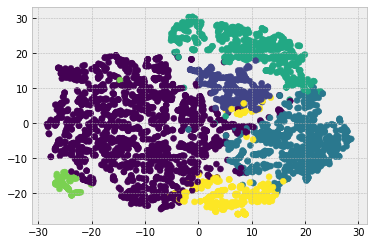

In [102]:
spectral = SpectralClustering(
        n_clusters=6, eigen_solver='arpack',
        affinity="nearest_neighbors",
         random_state=0).fit((conv))
labels = spectral.labels_
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels)

In [103]:
write(audio,labels,'nico6','conv5')

100%|██████████| 280/280 [00:00<00:00, 423972.97it/s]


In [104]:
audiopath = './audio22k/test_nico_.wav'
audio,conv = extract(audiopath,6) #conv7
start = time.time()
X_embedded = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(conv)
print(time.time()-start)

time:  0.06959152221679688
Tensor shape: torch.Size([1, 1, 29544052, 1])
[(1, 16, 1846503, 1), (1, 32, 115406, 1), (1, 64, 57704, 1), (1, 128, 28853, 1), (1, 256, 3606, 1), (1, 512, 1804, 1), (1, 1024, 903, 1), (1, 1000, 448, 1), (1, 401, 448, 1)]
Cout :  1024
0.7518048286437988


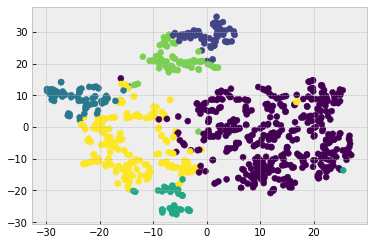

In [105]:
spectral = SpectralClustering(
        n_clusters=6, eigen_solver='arpack',
        affinity="nearest_neighbors",
         random_state=0).fit((conv))
labels = spectral.labels_
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels)

In [106]:
write(audio,labels,'nico6','conv7')

100%|██████████| 210/210 [00:00<00:00, 126716.13it/s]


-----------

In [115]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 10):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA

def eigenDecomposition(A, plot = True, topK = 5):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

------- Only works in  theorical data
1. fix 2 cluster, change neighbors, take max first derivate (silouette and calinski)
2. change No cluster with `k`, find cluster which maximize calinski

-----------------------

In [227]:
def spectral_explore_neighbors(features_vector,max_neighbors=30):
    metrics = []
    #Find number neighbors    
    if max_neighbors > features_vector.shape[0]:
        max_neighbors = features_vector.shape[0]//2 
    
    number = range(2,max_neighbors +1)
    for i in tqdm(number): 
        #fix n-cluster = 2, evaluate using calinski and silhouette
        spectral = SpectralClustering(n_clusters=2, 
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors",
                                      assign_labels="discretize",
                                      random_state=0,n_neighbors=i).fit((features_vector))
        labels = spectral.labels_
        metrics.append([silhouette_score(conv, labels,metric='cosine'),  # silhouette : best 1, worst -1 
                        calinski_harabasz_score(conv, labels)])   # calinski: the higher the better
       
    df = pd.DataFrame(metrics,index = number, columns = ['silhouette','calinski'])
    df.plot(y=['silhouette','calinski'],subplots=True,sharex=True,
            figsize=(10,12),fontsize=14,linewidth=2)
    
    ##best_neighbors: The mean of the indices where the first derivative of the metrics is maximum.
    best_neighbors = int(round((df.diff().idxmax().mean())))
    print("Best number of neighbors is {:d}".format(best_neighbors))
    return best_neighbors

In [222]:
def reduce_number_cluster(labels):
    counter = []
    best = len(np.unique(labels))
    for i in np.unique(labels):
        #count by label 
        counter.append((len(labels[labels==i]))/len(labels))
    
    df = pd.Series(counter,index=np.unique(labels))
    print(df)
    if len(df[df < 0.1]) > 0:
        print(df.mean()/df.std())
        if (df.mean()/df.std()) < 1.25:
            #Highly dispersed data, we keep the labels 
            #that have more dots than the first quartile.
            best = len(df[df > df.quantile(0.25)])
            print("Highly dispersed, final number of clusters {}".format(best))    
    return best


In [186]:
def spectral_explore_cluster(features_vector,best_neighbors,max_cluster=10):
    metrics = []
    all_labels = []
    #Find number cluster    
    number = range(2,max_cluster +1)
    for i in tqdm(number): 
        #evaluate using calinski 
        spectral = SpectralClustering(n_clusters=i, 
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors",
                                       assign_labels="discretize",
                                      random_state=0,n_neighbors=best_neighbors).fit((features_vector))
        labels = spectral.labels_
        metrics.append(calinski_harabasz_score(conv, labels))
        all_labels.append(labels)
        # calinski: the higher the better
    df = pd.DataFrame(metrics,index = number, columns = ['calinski'])
   # df.plot(y=['calinski'],subplots=True,sharex=True,figsize=(10,15),fontsize=16,linewidth=4)
   
    ##best_cluster: The index where the metrics is maximum.
    best_cluster = int(df.idxmax())
    print("Best number of cluster is {:d}".format(best_cluster))
    #check dispersion of labels
    best_cluster = reduce_number_cluster(all_labels[best_cluster - 2])
    return best_cluster

    

In [11]:
audiopath = './audio22k/caroleeg_perf1_.wav'
audio,conv = extract(audiopath,4) #conv7

time:  0.07926726341247559
Tensor shape: torch.Size([1, 1, 18858764, 1])
[(1, 16, 1178672, 1), (1, 32, 73667, 1), (1, 64, 36834, 1), (1, 128, 18418, 1), (1, 256, 2302, 1), (1, 512, 1152, 1), (1, 1024, 577, 1), (1, 1000, 285, 1), (1, 401, 285, 1)]
Cout :  256


In [12]:
k = spectral_explore_neighbors(conv)

NameError: name 'spectral_explore_neighbors' is not defined

In [294]:
c = spectral_explore_cluster(conv,k)

  0%|          | 0/9 [00:00<?, ?it/s]/home/brain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
 11%|█         | 1/9 [00:01<00:11,  1.43s/it]/home/brain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
 22%|██▏       | 2/9 [00:02<00:09,  1.42s/it]/home/brain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
 33%|███▎      | 3/9 [00:04<00:08,  1.40s/it]/home/brain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectra

Best number of cluster is 4
0    0.634231
1    0.003041
2    0.150738
3    0.211990
dtype: float64
0.9233540578585187
Highly dispersed, final number of clusters 3


In [284]:
c,k

(5, 18)